# __Assignment 1__

<br>

Finance 5330: Financial Econometrics <br>
Tyler J. Brough <br>
Due Date: January 29, 2019 <br>
<br>

Consider the daily stock returns of American Express (AXP), Caterpillar (CAT), and Starbucks (SBUX) from January 1999 to December 2008. The data are daily prices in the file _stock-data-hwk1.txt_. 

Here is some code to extract the price time series from the raw data in Python:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import math

In [2]:
rawData = pd.read_csv("stock-data-hwk1.csv")

In [3]:
rawData.head()

,PERMNO,date,TICKER,PRC,vwretd,ewretd
0,18542,19990104,CAT,47.3750,-0.000822,0.011409
1,18542,19990105,CAT,47.2500,0.011879,0.009512
2,18542,19990106,CAT,48.5000,0.021143,0.014866
3,18542,19990107,CAT,48.9375,-0.000798,0.003560
4,18542,19990108,CAT,51.0000,0.004602,0.009410


In [4]:
tickers = ['AXP', 'CAT', 'SBUX']

ind = rawData.TICKER == tickers[0]
axpData = rawData[ind]

ind = rawData.TICKER == tickers[1]
catData = rawData[ind]

ind = rawData.TICKER == tickers[2]
sbuxData = rawData[ind]

In [5]:
axpData.head()

,PERMNO,date,TICKER,PRC,vwretd,ewretd
2515,59176,19990104,AXP,101.5000,-0.000822,0.011409
2516,59176,19990105,AXP,99.5625,0.011879,0.009512
2517,59176,19990106,AXP,103.6250,0.021143,0.014866
2518,59176,19990107,AXP,104.8750,-0.000798,0.003560
2519,59176,19990108,AXP,108.0625,0.004602,0.009410


In [6]:
axpData.tail()

,PERMNO,date,TICKER,PRC,vwretd,ewretd
5025,59176,20081224,AXP,17.97,0.004514,0.005042
5026,59176,20081226,AXP,17.91,0.007191,0.011107
5027,59176,20081229,AXP,17.70,-0.004365,-0.015163
5028,59176,20081230,AXP,18.00,0.024764,0.021418
5029,59176,20081231,AXP,18.55,0.017404,0.034456


In [7]:
catData.head()

,PERMNO,date,TICKER,PRC,vwretd,ewretd
0,18542,19990104,CAT,47.3750,-0.000822,0.011409
1,18542,19990105,CAT,47.2500,0.011879,0.009512
2,18542,19990106,CAT,48.5000,0.021143,0.014866
3,18542,19990107,CAT,48.9375,-0.000798,0.003560
4,18542,19990108,CAT,51.0000,0.004602,0.009410


In [8]:
catData.tail()

,PERMNO,date,TICKER,PRC,vwretd,ewretd
2510,18542,20081224,CAT,41.91,0.004514,0.005042
2511,18542,20081226,CAT,42.72,0.007191,0.011107
2512,18542,20081229,CAT,42.34,-0.004365,-0.015163
2513,18542,20081230,CAT,43.66,0.024764,0.021418
2514,18542,20081231,CAT,44.67,0.017404,0.034456


In [9]:
sbuxData.head()

,PERMNO,date,TICKER,PRC,vwretd,ewretd
5030,77702,19990104,SBUX,53.8750,-0.000822,0.011409
5031,77702,19990105,SBUX,52.0000,0.011879,0.009512
5032,77702,19990106,SBUX,51.5625,0.021143,0.014866
5033,77702,19990107,SBUX,51.7500,-0.000798,0.003560
5034,77702,19990108,SBUX,52.8750,0.004602,0.009410


In [10]:
sbuxData.tail()

,PERMNO,date,TICKER,PRC,vwretd,ewretd
7540,77702,20081224,SBUX,9.34,0.004514,0.005042
7541,77702,20081226,SBUX,9.35,0.007191,0.011107
7542,77702,20081229,SBUX,9.03,-0.004365,-0.015163
7543,77702,20081230,SBUX,9.36,0.024764,0.021418
7544,77702,20081231,SBUX,9.46,0.017404,0.034456


You can access the price time series as (for example for AXP):

In [11]:
axpData.PRC

2515    101.5000
2516     99.5625
2517    103.6250
2518    104.8750
2519    108.0625
2520    106.2500
2521    102.3750
2522     98.6875
2523     96.0000
2524    104.3750
2525    100.5000
2526    102.0000
2527    102.5000
2528     98.5000
2529    101.5000
2530    101.7500
2531     99.4375
2532    100.4375
2533    102.8750
2534    100.7500
2535     99.6875
2536    100.5000
2537    100.2500
2538     98.1250
2539     97.0625
2540     95.9375
2541     96.7500
2542    101.0000
2543     99.9375
2544    102.1875
          ...   
5000     19.3800
5001     18.7400
5002     17.2300
5003     18.6900
5004     21.1800
5005     21.3700
5006     22.3000
5007     23.3100
5008     19.6400
5009     20.7600
5010     21.8700
5011     20.8400
5012     21.7800
5013     24.4400
5014     23.2900
5015     21.5600
5016     20.1300
5017     20.3400
5018     19.3400
5019     20.0600
5020     19.8100
5021     18.9000
5022     19.4300
5023     18.4200
5024     17.9600
5025     17.9700
5026     17.9100
5027     17.70

* (a) Calculate simple returns for the three series.

In [12]:
rawData['Simple_Return'] = 0.00
axp = list(axpData.PRC)
cat = list(catData.PRC)
sbux = list(sbuxData.PRC)

for i in range(1,2515):
    rawData['Simple_Return'][i] = (cat[i] - cat[i - 1]) / cat[i - 1]
for i in range(1,2515):
    rawData['Simple_Return'][i + 2515] = (axp[i] - axp[i - 1]) / axp[i - 1]
for i in range(1,2515):
    rawData['Simple_Return'][i + 5030] = (sbux[i] - sbux[i - 1]) / sbux[i - 1]

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [13]:
rawData

,PERMNO,date,TICKER,PRC,vwretd,ewretd,Simple_Return
0,18542,19990104,CAT,47.3750,-0.000822,0.011409,0.000000
1,18542,19990105,CAT,47.2500,0.011879,0.009512,-0.002639
2,18542,19990106,CAT,48.5000,0.021143,0.014866,0.026455
3,18542,19990107,CAT,48.9375,-0.000798,0.003560,0.009021
4,18542,19990108,CAT,51.0000,0.004602,0.009410,0.042146
5,18542,19990111,CAT,53.0000,-0.004991,0.006378,0.039216
6,18542,19990112,CAT,50.6250,-0.018202,-0.006131,-0.044811
7,18542,19990113,CAT,48.0625,-0.005751,-0.006715,-0.050617
8,18542,19990114,CAT,46.7500,-0.015797,-0.001111,-0.027308
9,18542,19990115,CAT,47.5625,0.023007,0.014609,0.017380


* (b) Express the simple returns in percentages. Compute the sample mean, standard deviation, skewness, excess kurtosis, minimum, and maximum of the percentage simple returns. 

In [17]:
tickers = ['AXP', 'CAT', 'SBUX']

ind = rawData.TICKER == tickers[0]
axpData = rawData[ind]

ind = rawData.TICKER == tickers[1]
catData = rawData[ind]

ind = rawData.TICKER == tickers[2]
sbuxData = rawData[ind]

In [18]:
rawData['Simple_Return_Percentage'] = 0.00
axp_perc = list(axpData.Simple_Return)
cat_perc = list(catData.Simple_Return)
sbux_perc = list(sbuxData.Simple_Return)
for i in range(1,2515):
    rawData['Simple_Return_Percentage'][i] = cat_perc[i] * 100
for i in range(1,2515):
    rawData['Simple_Return_Percentage'][i + 2515] = axp_perc[i] * 100
for i in range(1,2515):
    rawData['Simple_Return_Percentage'][i + 5030] = sbux_perc[i] * 100

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [19]:
rawData

,PERMNO,date,TICKER,PRC,vwretd,ewretd,Simple_Return,Simple_Return_Percentage
0,18542,19990104,CAT,47.3750,-0.000822,0.011409,0.000000,0.000000
1,18542,19990105,CAT,47.2500,0.011879,0.009512,-0.002639,-0.263852
2,18542,19990106,CAT,48.5000,0.021143,0.014866,0.026455,2.645503
3,18542,19990107,CAT,48.9375,-0.000798,0.003560,0.009021,0.902062
4,18542,19990108,CAT,51.0000,0.004602,0.009410,0.042146,4.214559
5,18542,19990111,CAT,53.0000,-0.004991,0.006378,0.039216,3.921569
6,18542,19990112,CAT,50.6250,-0.018202,-0.006131,-0.044811,-4.481132
7,18542,19990113,CAT,48.0625,-0.005751,-0.006715,-0.050617,-5.061728
8,18542,19990114,CAT,46.7500,-0.015797,-0.001111,-0.027308,-2.730819
9,18542,19990115,CAT,47.5625,0.023007,0.014609,0.017380,1.737968


In [20]:
tickers = ['AXP', 'CAT', 'SBUX']

ind = rawData.TICKER == tickers[0]
axpData = rawData[ind]

ind = rawData.TICKER == tickers[1]
catData = rawData[ind]

ind = rawData.TICKER == tickers[2]
sbuxData = rawData[ind]

In [21]:
avg_cat_percentage = np.mean(catData.Simple_Return_Percentage)
avg_axp_percentage = np.mean(axpData.Simple_Return_Percentage)
avg_sbux_percentage = np.mean(sbuxData.Simple_Return_Percentage)

print(f"The average daily percentage return for CAT is: {avg_cat_percentage : 0.4f}%")
print(f"The average daily percentage return for AXP is: {avg_axp_percentage : 0.4f}%")
print(f"The average daily percentage return for SBUX is: {avg_sbux_percentage : 0.4f}%")

The average daily percentage return for CAT is:  0.0285%
The average daily percentage return for AXP is: -0.0211%
The average daily percentage return for SBUX is: -0.0123%


In [22]:
stdev_cat_percentage = np.std(catData.Simple_Return_Percentage)
stdev_axp_percentage = np.std(axpData.Simple_Return_Percentage)
stdev_sbux_percentage = np.std(sbuxData.Simple_Return_Percentage)

print(f"The standard deviation for daily percentage return for CAT is: {stdev_cat_percentage : 0.4f}%")
print(f"The standard deviation for daily percentage return for AXP is: {stdev_axp_percentage : 0.4f}%")
print(f"The standard deviation for daily percentage return for SBUX is: {stdev_sbux_percentage : 0.4f}%")

The standard deviation for daily percentage return for CAT is:  2.3792%
The standard deviation for daily percentage return for AXP is:  2.7813%
The standard deviation for daily percentage return for SBUX is:  3.1508%


In [23]:
print('Skewness of percentage returns for CAT: {}'.format(skew(catData.Simple_Return_Percentage)))
print('Skewness of percentage returns for AXP: {}'.format(skew(axpData.Simple_Return_Percentage)))
print('Skewness of percentage returns for SBUX: {}'.format(skew(sbuxData.Simple_Return_Percentage)))

Skewness of percentage returns for CAT: -3.4438833459410687
Skewness of percentage returns for AXP: -5.209358569520932
Skewness of percentage returns for SBUX: -4.254920135447012


In [24]:
print('Excess kurtosis of percentage returns for CAT: {}'.format(kurtosis(catData.Simple_Return_Percentage) - 3))
print('Excess kurtosis of percentage returns for AXP: {}'.format(kurtosis(axpData.Simple_Return_Percentage) - 3))
print('Excess kurtosis of percentage returns for SBux: {}'.format(kurtosis(sbuxData.Simple_Return_Percentage) - 3))

Excess kurtosis of percentage returns for CAT: 70.37122165268637
Excess kurtosis of percentage returns for AXP: 121.49369091259283
Excess kurtosis of percentage returns for SBux: 64.97814368073698


In [25]:
print('The Max of percentage returns for CAT: {}%'.format(max(catData.Simple_Return_Percentage)))
print('The Max of percentage returns for AXP: {}%'.format(max(axpData.Simple_Return_Percentage)))
print('The Max of percentage returns for SBUX: {}%'.format(max(sbuxData.Simple_Return_Percentage)))

The Max of percentage returns for CAT: 14.722930674704369%
The Max of percentage returns for AXP: 17.926565874730034%
The Max of percentage returns for SBUX: 14.635364635364635%


In [26]:
print('The Min of percentage returns for CAT: {}%'.format(min(catData.Simple_Return_Percentage)))
print('The Min of percentage returns for AXP: {}%'.format(min(axpData.Simple_Return_Percentage)))
print('The Min of percentage returns for SBUX: {}%'.format(min(sbuxData.Simple_Return_Percentage)))

The Min of percentage returns for CAT: -48.91826923076923%
The Min of percentage returns for AXP: -65.47515257192677%
The Min of percentage returns for SBUX: -49.30012724959098%


* (c) Transform the simple returns to log returns. 

In [27]:
rawData['log_Return'] = 0.00

for i in range(1,2515):
    rawData['log_Return'][i] = math.log(cat[i]) - math.log(cat[i - 1])
for i in range(1,2515):
    rawData['log_Return'][i + 2515] = math.log(axp[i]) - math.log(axp[i - 1])
for i in range(1,2515):
    rawData['log_Return'][i + 5030] = math.log(sbux[i]) - math.log(sbux[i - 1])

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
rawData

,PERMNO,date,TICKER,PRC,vwretd,ewretd,Simple_Return,Simple_Return_Percentage,log_Return
0,18542,19990104,CAT,47.3750,-0.000822,0.011409,0.000000,0.000000,0.000000
1,18542,19990105,CAT,47.2500,0.011879,0.009512,-0.002639,-0.263852,-0.002642
2,18542,19990106,CAT,48.5000,0.021143,0.014866,0.026455,2.645503,0.026111
3,18542,19990107,CAT,48.9375,-0.000798,0.003560,0.009021,0.902062,0.008980
4,18542,19990108,CAT,51.0000,0.004602,0.009410,0.042146,4.214559,0.041282
5,18542,19990111,CAT,53.0000,-0.004991,0.006378,0.039216,3.921569,0.038466
6,18542,19990112,CAT,50.6250,-0.018202,-0.006131,-0.044811,-4.481132,-0.045846
7,18542,19990113,CAT,48.0625,-0.005751,-0.006715,-0.050617,-5.061728,-0.051943
8,18542,19990114,CAT,46.7500,-0.015797,-0.001111,-0.027308,-2.730819,-0.027688
9,18542,19990115,CAT,47.5625,0.023007,0.014609,0.017380,1.737968,0.017230


* (d) Express the log returns in percentages. Compute the sample mean, standard deviation, skewness, excess kurtosis, minimum, and maximum of the percentage log returns. 

In [30]:
tickers = ['AXP', 'CAT', 'SBUX']

ind = rawData.TICKER == tickers[0]
axpData = rawData[ind]

ind = rawData.TICKER == tickers[1]
catData = rawData[ind]

ind = rawData.TICKER == tickers[2]
sbuxData = rawData[ind]

In [31]:
rawData['log_Return_Percentage'] = 0.00
logaxp_perc = list(axpData.log_Return)
logcat_perc = list(catData.log_Return)
logsbux_perc = list(sbuxData.log_Return)
for i in range(1,2515):
    rawData['log_Return_Percentage'][i] = logcat_perc[i] * 100
for i in range(1,2515):
    rawData['log_Return_Percentage'][i + 2515] = logaxp_perc[i] * 100
for i in range(1,2515):
    rawData['log_Return_Percentage'][i + 5030] = logsbux_perc[i] * 100

C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [32]:
rawData

,PERMNO,date,TICKER,PRC,vwretd,ewretd,Simple_Return,Simple_Return_Percentage,log_Return,log_Return_Percentage
0,18542,19990104,CAT,47.3750,-0.000822,0.011409,0.000000,0.000000,0.000000,0.000000
1,18542,19990105,CAT,47.2500,0.011879,0.009512,-0.002639,-0.263852,-0.002642,-0.264201
2,18542,19990106,CAT,48.5000,0.021143,0.014866,0.026455,2.645503,0.026111,2.611114
3,18542,19990107,CAT,48.9375,-0.000798,0.003560,0.009021,0.902062,0.008980,0.898018
4,18542,19990108,CAT,51.0000,0.004602,0.009410,0.042146,4.214559,0.041282,4.128166
5,18542,19990111,CAT,53.0000,-0.004991,0.006378,0.039216,3.921569,0.038466,3.846628
6,18542,19990112,CAT,50.6250,-0.018202,-0.006131,-0.044811,-4.481132,-0.045846,-4.584639
7,18542,19990113,CAT,48.0625,-0.005751,-0.006715,-0.050617,-5.061728,-0.051943,-5.194328
8,18542,19990114,CAT,46.7500,-0.015797,-0.001111,-0.027308,-2.730819,-0.027688,-2.768799
9,18542,19990115,CAT,47.5625,0.023007,0.014609,0.017380,1.737968,0.017230,1.723038


In [111]:
tickers = ['AXP', 'CAT', 'SBUX']

ind = rawData.TICKER == tickers[0]
axpData = rawData[ind]

ind = rawData.TICKER == tickers[1]
catData = rawData[ind]

ind = rawData.TICKER == tickers[2]
sbuxData = rawData[ind]

In [34]:
logavg_cat_percentage = np.mean(catData.log_Return_Percentage)
logavg_axp_percentage = np.mean(axpData.log_Return_Percentage)
logavg_sbux_percentage = np.mean(sbuxData.log_Return_Percentage)

print(f"The average log daily percentage return for CAT is: {logavg_cat_percentage : 0.4f}%")
print(f"The average log daily percentage return for AXP is: {logavg_axp_percentage : 0.4f}%")
print(f"The average log daily percentage return for SBUX is: {logavg_sbux_percentage : 0.4f}%")

The average log daily percentage return for CAT is: -0.0023%
The average log daily percentage return for AXP is: -0.0676%
The average log daily percentage return for SBUX is: -0.0692%


In [35]:
logstdev_cat_percentage = np.std(catData.log_Return_Percentage)
logstdev_axp_percentage = np.std(axpData.log_Return_Percentage)
logstdev_sbux_percentage = np.std(sbuxData.log_Return_Percentage)

print(f"The standard deviation for log daily percentage return for CAT is: {logstdev_cat_percentage : 0.4f}%")
print(f"The standard deviation for log daily percentage return for AXP is: {logstdev_axp_percentage : 0.4f}%")
print(f"The standard deviation for log daily percentage return for SBUX is: {logstdev_sbux_percentage : 0.4f}%")

The standard deviation for log daily percentage return for CAT is:  2.5521%
The standard deviation for log daily percentage return for AXP is:  3.2503%
The standard deviation for log daily percentage return for SBUX is:  3.5168%


In [36]:
print('Skewness of log percentage returns for CAT: {}'.format(skew(catData.log_Return_Percentage)))
print('Skewness of log percentage returns for AXP: {}'.format(skew(axpData.log_Return_Percentage)))
print('Skewness of log percentage returns for SBUX: {}'.format(skew(sbuxData.log_Return_Percentage)))

Skewness of log percentage returns for CAT: -7.36067421000893
Skewness of log percentage returns for AXP: -14.042545671130197
Skewness of log percentage returns for SBUX: -7.959581235030049


In [37]:
print('Excess kurtosis of log percentage returns for CAT: {}'.format(kurtosis(catData.log_Return_Percentage) - 3))
print('Excess kurtosis of log percentage returns for AXP: {}'.format(kurtosis(axpData.log_Return_Percentage) - 3))
print('Excess kurtosis of log percentage returns for SBux: {}'.format(kurtosis(sbuxData.log_Return_Percentage) - 3))

Excess kurtosis of log percentage returns for CAT: 188.8575661155345
Excess kurtosis of log percentage returns for AXP: 451.69752731320875
Excess kurtosis of log percentage returns for SBux: 143.7789224260263


In [38]:
print('The Max of log percentage returns for CAT: {}%'.format(max(catData.log_Return_Percentage)))
print('The Max of log percentage returns for AXP: {}%'.format(max(axpData.log_Return_Percentage)))
print('The Max of log percentage returns for SBUX: {}%'.format(max(sbuxData.log_Return_Percentage)))

The Max of log percentage returns for CAT: 13.734973686453511%
The Max of log percentage returns for AXP: 16.489192165867106%
The Max of log percentage returns for SBUX: 13.658616261947953%


In [45]:
print('The Min of percentage returns for CAT: {}%'.format(min(catData.log_Return_Percentage)))
print('The Min of percentage returns for AXP: {}%'.format(min(axpData.log_Return_Percentage)))
print('The Min of percentage returns for SBUX: {}%'.format(min(sbuxData.log_Return_Percentage)))

The Min of percentage returns for CAT: -67.17432718967919%
The Min of percentage returns for AXP: -106.349090587489%
The Min of percentage returns for SBUX: -67.92467852479693%


* (e) Test the null hypothesis that the mean of the log returns of each stock is zero. That is, perform three separate tests. Use 5% significance level to draw your conclusion. 

In [55]:
from scipy import stats
cat_results = stats.ttest_1samp(catData.log_Return_Percentage, 0)
axp_results = stats.ttest_1samp(axpData.log_Return_Percentage, 0)
sbux_results = stats.ttest_1samp(sbuxData.log_Return_Percentage, 0)

In [62]:
print(f"The t-stat for log returns for CAT equal to 0 is: {cat_results[0] : 0.4f}")
print(f"The p-value for log returns for CAT equal to 0 is: {cat_results[1] : 0.4f}")
print("I fail to reject the null hypothesis that the mean of log returns for CAT is 0 at the .05 significance level.")

The t-stat for log returns for CAT equal to 0 is: -0.0459
The p-value for log returns for CAT equal to 0 is:  0.9634
I fail to reject the null hypothesis that the mean of log returns for CAT is 0 at the .05 significance level.


In [63]:
print(f"The t-stat for log returns for AXP equal to 0 is: {axp_results[0] : 0.4f}")
print(f"The p-value for log returns for AXP equal to 0 is: {axp_results[1] : 0.4f}")
print("I fail to reject the null hypothesis that the mean of log returns for AXP is 0 at the .05 significance level.")

The t-stat for log returns for AXP equal to 0 is: -1.0425
The p-value for log returns for AXP equal to 0 is:  0.2973
I fail to reject the null hypothesis that the mean of log returns for AXP is 0 at the .05 significance level.


In [64]:
print(f"The t-stat for log returns for SBUX equal to 0 is: {sbux_results[0] : 0.4f}")
print(f"The p-value for log returns for SBUX equal to 0 is: {sbux_results[1] : 0.4f}")
print("I fail to reject the null hypothesis that the mean of log returns for SBUX is 0 at the .05 significance level.")

The t-stat for log returns for SBUX equal to 0 is: -0.9862
The p-value for log returns for SBUX equal to 0 is:  0.3242
I fail to reject the null hypothesis that the mean of log returns for SBUX is 0 at the .05 significance level.


* (f) Plot histograms for each of the three series (both simple and log returns - so six graphs total).

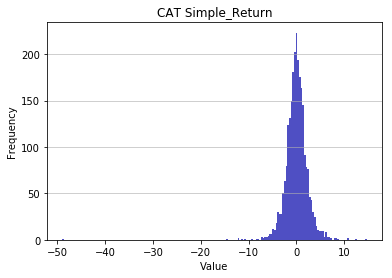

In [124]:
n, bins, patches = plt.hist(x=catData.Simple_Return_Percentage, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('CAT Simple_Return')
maxfreq = n.max()

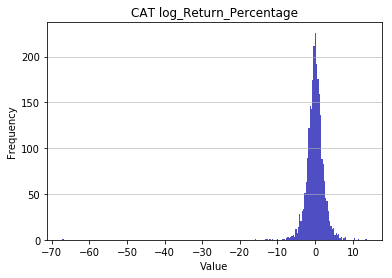

In [123]:
n, bins, patches = plt.hist(x=catData.log_Return_Percentage, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('CAT log_Return_Percentage')
maxfreq = n.max()

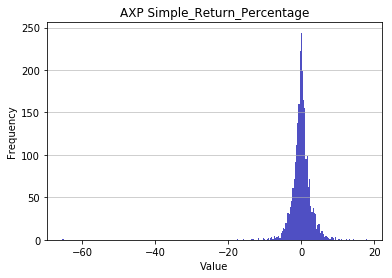

In [121]:
n, bins, patches = plt.hist(x=axpData.Simple_Return_Percentage, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('AXP Simple_Return_Percentage')
maxfreq = n.max()

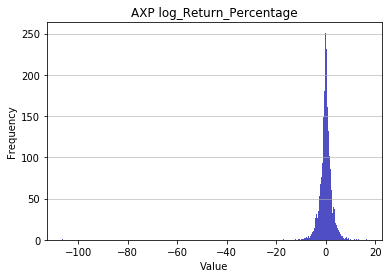

In [122]:
n, bins, patches = plt.hist(x=axpData.log_Return_Percentage, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('AXP log_Return_Percentage')
maxfreq = n.max()

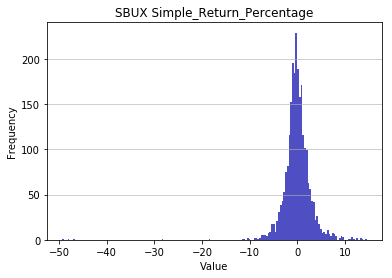

In [120]:
n, bins, patches = plt.hist(x=sbuxData.Simple_Return_Percentage, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('SBUX Simple_Return_Percentage')
maxfreq = n.max()

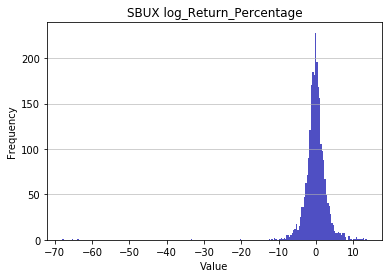

In [119]:
n, bins, patches = plt.hist(x=sbuxData.log_Return_Percentage, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('SBUX log_Return_Percentage')
maxfreq = n.max()

* (g) Test the null hypothesis that the lag-$2$ autocorrelation is zero for log returns.